In [1]:
# We will do some more exploring here, and will be creating a couple of word clouds - imports needed:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# this csv was created in the 01_explore notebook
df = pd.read_csv('../Data/expanded_notes_data.csv')
df

,Unnamed: 0,SUBJECT_ID,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
0,0,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-20,2133-02-20 18:56:00,Radiology,DISTINCT PROCEDURAL SERVICE,NaN,[**2133-2-20**] 6:56 PM\n MESENTERIC ...,GASTROINTESTINAL BLEED
1,1,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-21,2133-02-21 05:07:00,Nursing/other,Report,NaN,MICU NPN 7P-7A\nPt. came from IR around 2200 p...,GASTROINTESTINAL BLEED
2,2,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-23,2133-02-23 10:48:00,Radiology,CT PELVIS W/CONTRAST,NaN,[**2133-2-23**] 10:48 AM\n CTA ABD W&W/O C & R...,GASTROINTESTINAL BLEED
3,3,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-24,NaN,Discharge summary,Report,NaN,Admission Date: [**2133-2-20**] Dischar...,GASTROINTESTINAL BLEED
4,4,112,M,Medicare,NaN,JEWISH,MARRIED,WHITE,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-13,NaN,ECG,Report,NaN,Sinus rhythm\nAnterolateral ST-T changes sugge...,GASTROINTESTINAL BLEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,35992,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-12,NaN,Echo,Report,NaN,PATIENT/TEST INFORMATION:\nIndication: CAD. Re...,GASTROINTESTINAL BLEED
35993,35993,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 09:12:00,Radiology,VENOUS DUP UPPER EXT BILATERAL,NaN,[**2183-2-14**] 9:12 AM\n VENOUS DUP UPPER EXT...,GASTROINTESTINAL BLEED
35994,35994,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 19:07:00,Radiology,REMOVE TUNNELED CENTRAL W/O PORT,NaN,[**2183-2-14**] 7:07 PM\n TUNNEL DIALYSIS REPL...,GASTROINTESTINAL BLEED
35995,35995,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-16,NaN,ECG,Report,NaN,Sinus rhythm. Left ventricular hypertrophy wit...,GASTROINTESTINAL BLEED


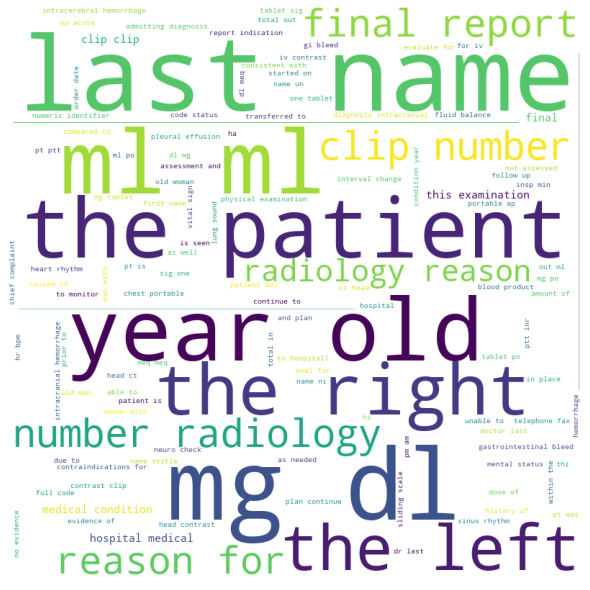

In [3]:
words = ''
stopwords = set(STOPWORDS)

#ITERATE THROUGH NOTES TO REMOVE STOPWORDS (STANDARD ENGLISH) AND MAKE EVERYTHING LOWERCASE 
for val in df.TEXT:
    #make vals strings
    val = str(val)
    #split
    tokens = val.split()
    #convert to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    words += " ".join(tokens)+" "
    
cloud = WordCloud(width = 800,height = 800,
                  background_color = 'white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(words)

# plot and save the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../Reports/images/First_Word_Cloud.png')
plt.show() 

In [4]:
#Let's split out the two diagnosse and see what we have
gastro = df[(df.DIAGNOSIS == 'GASTROINTESTINAL BLEED')]
gastro

,Unnamed: 0,SUBJECT_ID,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
0,0,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-20,2133-02-20 18:56:00,Radiology,DISTINCT PROCEDURAL SERVICE,NaN,[**2133-2-20**] 6:56 PM\n MESENTERIC ...,GASTROINTESTINAL BLEED
1,1,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-21,2133-02-21 05:07:00,Nursing/other,Report,NaN,MICU NPN 7P-7A\nPt. came from IR around 2200 p...,GASTROINTESTINAL BLEED
2,2,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-23,2133-02-23 10:48:00,Radiology,CT PELVIS W/CONTRAST,NaN,[**2133-2-23**] 10:48 AM\n CTA ABD W&W/O C & R...,GASTROINTESTINAL BLEED
3,3,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-24,NaN,Discharge summary,Report,NaN,Admission Date: [**2133-2-20**] Dischar...,GASTROINTESTINAL BLEED
4,4,112,M,Medicare,NaN,JEWISH,MARRIED,WHITE,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-13,NaN,ECG,Report,NaN,Sinus rhythm\nAnterolateral ST-T changes sugge...,GASTROINTESTINAL BLEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,35992,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-12,NaN,Echo,Report,NaN,PATIENT/TEST INFORMATION:\nIndication: CAD. Re...,GASTROINTESTINAL BLEED
35993,35993,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 09:12:00,Radiology,VENOUS DUP UPPER EXT BILATERAL,NaN,[**2183-2-14**] 9:12 AM\n VENOUS DUP UPPER EXT...,GASTROINTESTINAL BLEED
35994,35994,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 19:07:00,Radiology,REMOVE TUNNELED CENTRAL W/O PORT,NaN,[**2183-2-14**] 7:07 PM\n TUNNEL DIALYSIS REPL...,GASTROINTESTINAL BLEED
35995,35995,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-16,NaN,ECG,Report,NaN,Sinus rhythm. Left ventricular hypertrophy wit...,GASTROINTESTINAL BLEED


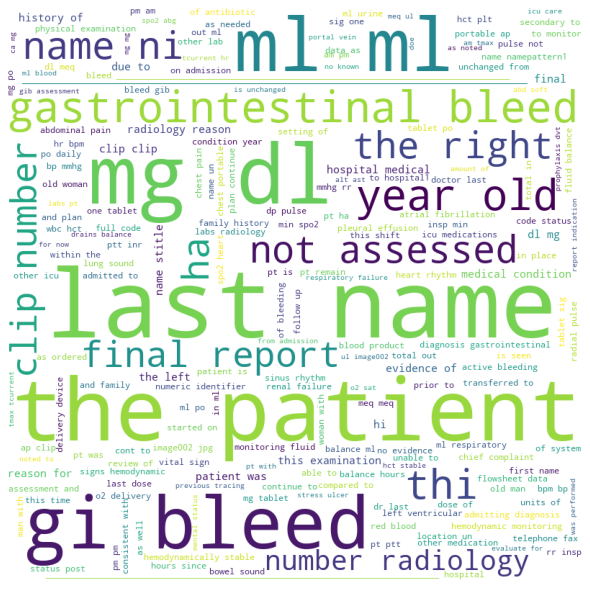

In [5]:
words = ''
stopwords = set(STOPWORDS)

#ITERATE THROUGH NOTES AS ABOVE WITH GASTRO SUBSET
for val in gastro.TEXT:
    #make vals strings
    val = str(val)
    #split
    tokens = val.split()
    #convert to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    words += " ".join(tokens)+" "
    
cloud = WordCloud(width = 800,height = 800,
                  background_color = 'white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../Reports/images/Gastro_Word_Cloud.png')
plt.show() 

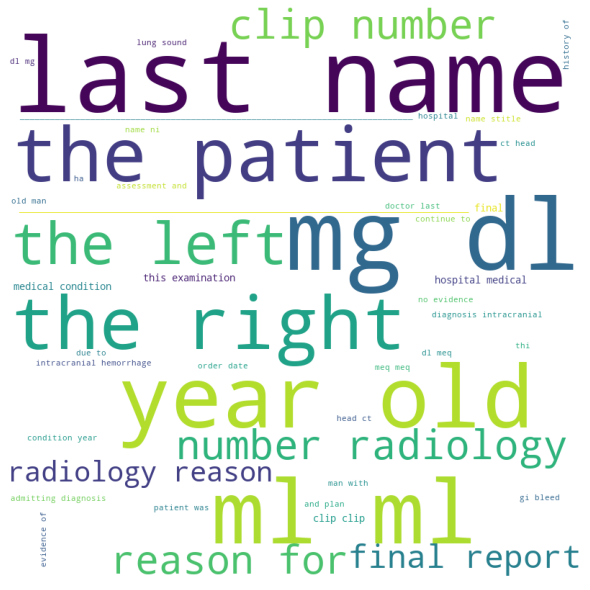

In [6]:
cranial = df[(df.DIAGNOSIS == 'INTRACRANIAL HEMORRHAGE')]
cranial

#ITERATE THROUGH NOTES AS ABOVE WITH CRANIAL SUBSET
for val in cranial.TEXT:
    #make vals strings
    val = str(val)
    #split
    tokens = val.split()
    #convert to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    words += " ".join(tokens)+" "
    
cloud = WordCloud(width = 800,height = 800,
                  background_color = 'white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../Reports/images/Cranial_Word_Cloud.png') 
plt.show() 

In [7]:
ic_no_ds = df[(df.DIAGNOSIS == 'INTRACRANIAL HEMORRHAGE')&(df.CATEGORY != 'Discharge summary')]
ic_no_ds

,Unnamed: 0,SUBJECT_ID,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
40,40,212,M,Private,NaN,CATHOLIC,MARRIED,WHITE,189635,EMERGENCY,EMERGENCY ROOM ADMIT,2189-11-07,2189-11-07 18:58:00,Radiology,CT HEAD W/O CONTRAST,NaN,[**2189-11-7**] 6:58 PM\n CT HEAD W/O CONTRAST...,INTRACRANIAL HEMORRHAGE
41,41,212,M,Private,NaN,CATHOLIC,MARRIED,WHITE,189635,EMERGENCY,EMERGENCY ROOM ADMIT,2189-11-07,2189-11-07 22:15:00,Radiology,CHEST (PORTABLE AP),NaN,[**2189-11-7**] 10:15 PM\n CHEST (PORTABLE AP)...,INTRACRANIAL HEMORRHAGE
42,42,212,M,Private,NaN,CATHOLIC,MARRIED,WHITE,189635,EMERGENCY,EMERGENCY ROOM ADMIT,2189-11-08,2189-11-08 04:47:00,Nursing/other,Report,NaN,ADM NOTE\nPT CAME IN FROM [**Hospital 1121**] ...,INTRACRANIAL HEMORRHAGE
43,43,212,M,Private,NaN,CATHOLIC,MARRIED,WHITE,189635,EMERGENCY,EMERGENCY ROOM ADMIT,2189-11-08,2189-11-08 10:32:00,Radiology,CT HEAD W/O CONTRAST,NaN,[**2189-11-8**] 10:32 AM\n CT HEAD W/O CONTRAS...,INTRACRANIAL HEMORRHAGE
44,44,212,M,Private,NaN,CATHOLIC,MARRIED,WHITE,189635,EMERGENCY,EMERGENCY ROOM ADMIT,2189-11-08,2189-11-08 16:49:00,Nursing/other,Report,NaN,Nsg.progress notes:\nsee flow sheet for specif...,INTRACRANIAL HEMORRHAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,35977,99366,M,Medicaid,ARAB,UNOBTAINABLE,NaN,UNABLE TO OBTAIN,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,2197-03-28,2197-03-28 10:56:00,Radiology,BILAT LOWER EXT VEINS,NaN,[**2197-3-28**] 10:56 AM\n BILAT LOWER EXT VEI...,INTRACRANIAL HEMORRHAGE
35978,35978,99366,M,Medicaid,ARAB,UNOBTAINABLE,NaN,UNABLE TO OBTAIN,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,2197-03-31,2197-03-31 14:13:00,Radiology,CHEST (PA & LAT),NaN,[**2197-3-31**] 2:13 PM\n CHEST (PA & LAT) ...,INTRACRANIAL HEMORRHAGE
35979,35979,99366,M,Medicaid,ARAB,UNOBTAINABLE,NaN,UNABLE TO OBTAIN,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,2197-04-04,2197-04-04 08:36:00,Radiology,BILAT LOWER EXT VEINS,NaN,[**2197-4-4**] 8:36 AM\n BILAT LOWER EXT VEINS...,INTRACRANIAL HEMORRHAGE
35980,35980,99366,M,Medicaid,ARAB,UNOBTAINABLE,NaN,UNABLE TO OBTAIN,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,2197-04-12,2197-04-12 13:31:00,Radiology,BILAT LOWER EXT VEINS,NaN,[**2197-4-12**] 1:31 PM\n BILAT LOWER EXT VEIN...,INTRACRANIAL HEMORRHAGE


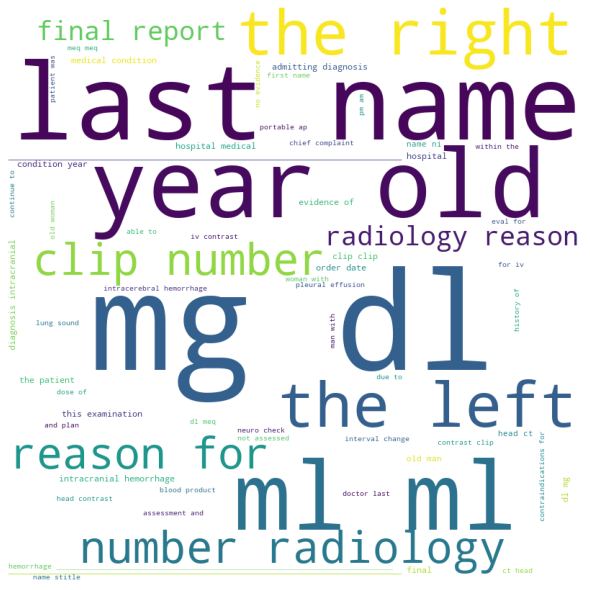

In [8]:
#ITERATE THROUGH NOTES AS ABOVE WITH CRANIAL DISCHARGE SUMMARY SUBSET

for val in ic_no_ds.TEXT:
    #make vals strings
    val = str(val)
    #split
    tokens = val.split()
    #convert to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    words += " ".join(tokens)+" "
    
cloud = WordCloud(width = 800,height = 800,
                  background_color = 'white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../Reports/images/Cranial_DC_Word_Cloud.png') 
plt.show() 

In [9]:
# importing stuff so we can model this again!

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import unicodedata
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
import re

# Models
from sklearn.naive_bayes import MultinomialNB

# Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, make_scorer

# additional viz
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import PIL.ImageOps

#.py file
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
#import src.functions as asp

np.random.seed(42)
%matplotlib inline
%load_ext autoreload
%autoreload 2

Let's try to run the model and not include the discharge summary notes.

In [10]:
no_ds = df[(df.CATEGORY != 'Discharge summary')]
no_ds

,Unnamed: 0,SUBJECT_ID,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
0,0,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-20,2133-02-20 18:56:00,Radiology,DISTINCT PROCEDURAL SERVICE,NaN,[**2133-2-20**] 6:56 PM\n MESENTERIC ...,GASTROINTESTINAL BLEED
1,1,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-21,2133-02-21 05:07:00,Nursing/other,Report,NaN,MICU NPN 7P-7A\nPt. came from IR around 2200 p...,GASTROINTESTINAL BLEED
2,2,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-23,2133-02-23 10:48:00,Radiology,CT PELVIS W/CONTRAST,NaN,[**2133-2-23**] 10:48 AM\n CTA ABD W&W/O C & R...,GASTROINTESTINAL BLEED
4,4,112,M,Medicare,NaN,JEWISH,MARRIED,WHITE,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-13,NaN,ECG,Report,NaN,Sinus rhythm\nAnterolateral ST-T changes sugge...,GASTROINTESTINAL BLEED
5,5,112,M,Medicare,NaN,JEWISH,MARRIED,WHITE,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-13,NaN,ECG,Report,NaN,Sinus rhythm\nInferior/lateral ST-T changes ar...,GASTROINTESTINAL BLEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,35991,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-10,2183-02-10 02:23:00,Radiology,CHEST (PORTABLE AP),NaN,[**2183-2-10**] 2:23 AM\n CHEST (PORTABLE AP) ...,GASTROINTESTINAL BLEED
35992,35992,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-12,NaN,Echo,Report,NaN,PATIENT/TEST INFORMATION:\nIndication: CAD. Re...,GASTROINTESTINAL BLEED
35993,35993,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 09:12:00,Radiology,VENOUS DUP UPPER EXT BILATERAL,NaN,[**2183-2-14**] 9:12 AM\n VENOUS DUP UPPER EXT...,GASTROINTESTINAL BLEED
35994,35994,99562,M,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,129689,URGENT,TRANSFER FROM HOSP/EXTRAM,2183-02-14,2183-02-14 19:07:00,Radiology,REMOVE TUNNELED CENTRAL W/O PORT,NaN,[**2183-2-14**] 7:07 PM\n TUNNEL DIALYSIS REPL...,GASTROINTESTINAL BLEED


In [11]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def doc_preparer(doc, stop_words=sw):
    '''  
    :param doc: a document from the corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

#preprocess our data on the set without discharge summary notes and split into train/test

X = no_ds.TEXT.astype('str')
y = no_ds.DIAGNOSIS.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

'intracerebral hemorrhage ich assessment patient alert orient x perl mae r side strong bit l eft slow affect ventric cm tragus drain hour icp action monitor neuro dilantin continue po response pt able let need know us bedpan well move around bed able sleep hour time plan continue monitor icp dranage consider vp shunt v remove ventric pain control acute pain chronic pain assessment c headache sporadically action pain assessment ongoing get dilodid prn po effect pain reduction comfort level response pt report reduction headache intervention plan pain assessment medicate prn keep ventric open rash assessment red microscopular rash appear last night pt back primarily c severe itch burn sensation skin action medicate benadryl sarna lotion apply back response pr report easement itch absence burn sensation plan continue sarna lotion comfort'

In [12]:
# Validation train-test split to build our best model
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train, test_size=.25, random_state=42)

cv = CountVectorizer(max_df=250,max_features=500)

X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)
X_t_vec

,abp,abrasion,abscess,acidosis,address,adm,alarm,alcoholic,alkalosis,alone,...,wallet,ward,watch,waveform,wiggle,wish,write,xrt,zofran,zone
8131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#model is a naive bayes multinomial classifier

mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)
prior_0 = y_t.value_counts()['GASTROINTESTINAL BLEED']/len(y_t)
prior_1 = y_t.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_t)

print(prior_0, prior_1)
print(np.log(prior_1))

0.41441302220161746 0.5855869777983825
-0.5351405539484392


In [14]:
#because we are concerned with the correctly predicting the right diagnosis, we are going to use the accuracy score.

from sklearn.metrics import accuracy_score, confusion_matrix

y_hat = mnb.predict(X_t_vec)
print(accuracy_score(y_t, y_hat))
print(confusion_matrix(y_t,y_hat))

0.7590274558285685
[[5205 2840]
 [1838 9530]]


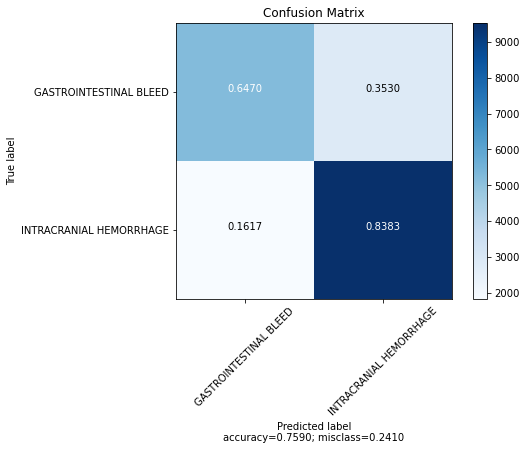

<Figure size 432x288 with 0 Axes>

In [15]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm = np.array(confusion_matrix(y_t,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_no_DS.png') 

In [16]:
# Validation train-test split to build our best model
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train, test_size=.25, random_state=42)

tfidf = TfidfVectorizer(max_df=250,max_features=500)

X_t_vec = tfidf.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)
X_t_vec

,abp,abrasion,abscess,acidosis,address,adm,alarm,alcoholic,alkalosis,alone,...,wallet,ward,watch,waveform,wiggle,wish,write,xrt,zofran,zone
8131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516166,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)
prior_0 = y_t.value_counts()['GASTROINTESTINAL BLEED']/len(y_t)
prior_1 = y_t.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_t)

print(prior_0, prior_1)
print(np.log(prior_1))

0.41441302220161746 0.5855869777983825
-0.5351405539484392


In [18]:
y_hat = mnb.predict(X_t_vec)
print(accuracy_score(y_t, y_hat))
print(confusion_matrix(y_t,y_hat))

0.7669602843455416
[[5020 3025]
 [1499 9869]]


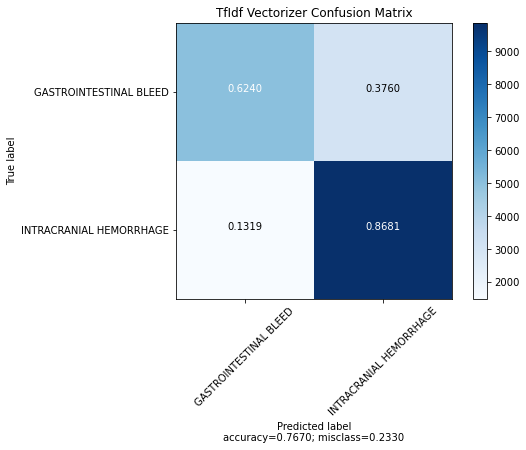

<Figure size 432x288 with 0 Axes>

In [19]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_t,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "TfIdf Vectorizer Confusion Matrix")
plt.savefig('../Reports/images/TFIDF_ConfMat_no_DS.png') 

In [20]:
only_ds = df[(df.CATEGORY == 'Discharge summary')]
only_ds

,Unnamed: 0,SUBJECT_ID,GENDER,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,CHARTDATE,CHARTTIME,CATEGORY,DESCRIPTION,ISERROR,TEXT,DIAGNOSIS
3,3,46,M,Medicare,NaN,CATHOLIC,SINGLE,WHITE,144073,EMERGENCY,CLINIC REFERRAL/PREMATURE,2133-02-24,NaN,Discharge summary,Report,NaN,Admission Date: [**2133-2-20**] Dischar...,GASTROINTESTINAL BLEED
10,10,112,M,Medicare,NaN,JEWISH,MARRIED,WHITE,174105,EMERGENCY,EMERGENCY ROOM ADMIT,2194-06-18,NaN,Discharge summary,Report,NaN,Admission Date: [**2194-6-13**] Dischar...,GASTROINTESTINAL BLEED
15,15,158,M,Private,NaN,JEWISH,MARRIED,WHITE,169433,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2170-02-06,NaN,Discharge summary,Report,NaN,Admission Date: [**2170-2-3**] Discharg...,GASTROINTESTINAL BLEED
39,39,186,F,Medicare,GREE,GREEK ORTHODOX,MARRIED,WHITE,164405,EMERGENCY,EMERGENCY ROOM ADMIT,2176-10-01,NaN,Discharge summary,Report,NaN,Admission Date: [**2176-9-25**] ...,GASTROINTESTINAL BLEED
47,47,212,M,Private,NaN,CATHOLIC,MARRIED,WHITE,189635,EMERGENCY,EMERGENCY ROOM ADMIT,2189-11-10,NaN,Discharge summary,Report,NaN,Admission Date: [**2189-11-7**] ...,INTRACRANIAL HEMORRHAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35919,35919,98948,M,Medicaid,ENGL,UNOBTAINABLE,SINGLE,UNABLE TO OBTAIN,125469,EMERGENCY,CLINIC REFERRAL/PREMATURE,2136-10-29,NaN,Discharge summary,Report,NaN,Admission Date: [**2136-10-21**] ...,INTRACRANIAL HEMORRHAGE
35921,35921,99183,M,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,184631,EMERGENCY,CLINIC REFERRAL/PREMATURE,2157-03-04,NaN,Discharge summary,Report,NaN,Admission Date: [**2157-3-1**] D...,GASTROINTESTINAL BLEED
35951,35951,99184,F,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,WHITE,171203,EMERGENCY,EMERGENCY ROOM ADMIT,2193-12-19,NaN,Discharge summary,Report,NaN,Admission Date: [**2193-12-16**] ...,INTRACRANIAL HEMORRHAGE
35982,35982,99366,M,Medicaid,ARAB,UNOBTAINABLE,NaN,UNABLE TO OBTAIN,136021,EMERGENCY,CLINIC REFERRAL/PREMATURE,2197-05-18,NaN,Discharge summary,Report,NaN,Admission Date: [**2197-3-20**] ...,INTRACRANIAL HEMORRHAGE


In [21]:
X = only_ds.TEXT.astype('str')
y = only_ds.DIAGNOSIS.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

'admission date discharge date date birth sex f service neurosurgery allergies codeine attend first name lf chief complaint headache nausea vomit major surgical invasive procedure none history present illness f patient w alzheimer dementia p fall c h difficulty w vision n v today past medical history alzheimer dementia p fall month w leave humerus fx social history non contributory family history non contributory physical exam upon admission mental status awake asleep arousable cooperative exam orientation orient person partially place language speech fluent good comprehension dysarthria paraphasic error ii pupil equally round reactive light mm bilaterally visual field difficult examine likely partial right homonymous hemianopsia iii iv vi extraocular movement intact bilaterally without nystagmus v vii facial strength sensation intact symmetric xii tongue midline without fasciculation motor normal bulk tone bilaterally strength full power throughout pronator drift sensation intact ligh

In [22]:
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train, test_size=.25, random_state=42)

cv = CountVectorizer(max_df=250,max_features=500)

X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)
X_t_vec

,abnormal,abnormality,abuse,acid,active,additional,afebrile,afib,age,airway,...,wean,weight,wheeze,white,wife,woman,worsen,wound,xii,yo
4993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,1,0,0
23046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1,0
2184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0
15347,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,2,0,0,0,0
27677,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35878,2,0,0,0,9,0,1,0,2,0,...,1,1,1,1,0,0,0,2,0,1
17730,7,4,0,0,0,0,0,0,2,1,...,0,1,0,3,2,0,2,0,0,1
34241,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
17268,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1,0


In [23]:
mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)
prior_0 = y_t.value_counts()['GASTROINTESTINAL BLEED']/len(y_t)
prior_1 = y_t.value_counts()['INTRACRANIAL HEMORRHAGE']/len(y_t)

print(prior_0, prior_1)
print(np.log(prior_1))

0.5311750599520384 0.46882494004796166
-0.7575258423733809


In [24]:
y_hat = mnb.predict(X_t_vec)
print(accuracy_score(y_t, y_hat))
print(confusion_matrix(y_t,y_hat))

0.9832134292565947
[[440   3]
 [ 11 380]]


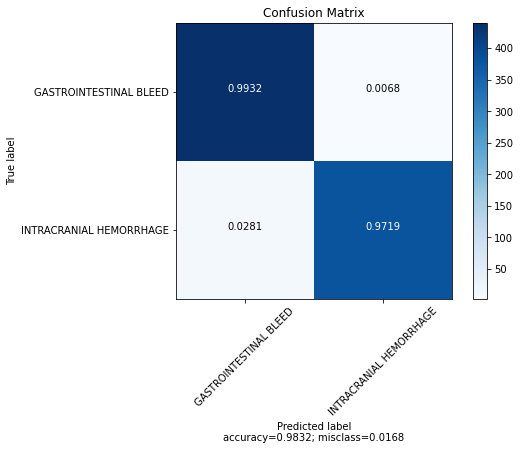

<Figure size 432x288 with 0 Axes>

In [25]:
plot_confusion_matrix(cm = np.array(confusion_matrix(y_t,y_hat)), 
                      normalize    = True,
                      target_names = ['GASTROINTESTINAL BLEED','INTRACRANIAL HEMORRHAGE'],
                      title        = "Confusion Matrix")

plt.savefig('../Reports/images/ConfMat_DS.png') 

#### this is a really high accuracy score when we use the discharge summary.  That makes sense because you generally will have the diagnosis in the discharge summary notes, but for a  very simple model this is a good start.  What we need to do next is pick out some ICD codes that are associated with these diagnoses
